::::Reading file::::
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

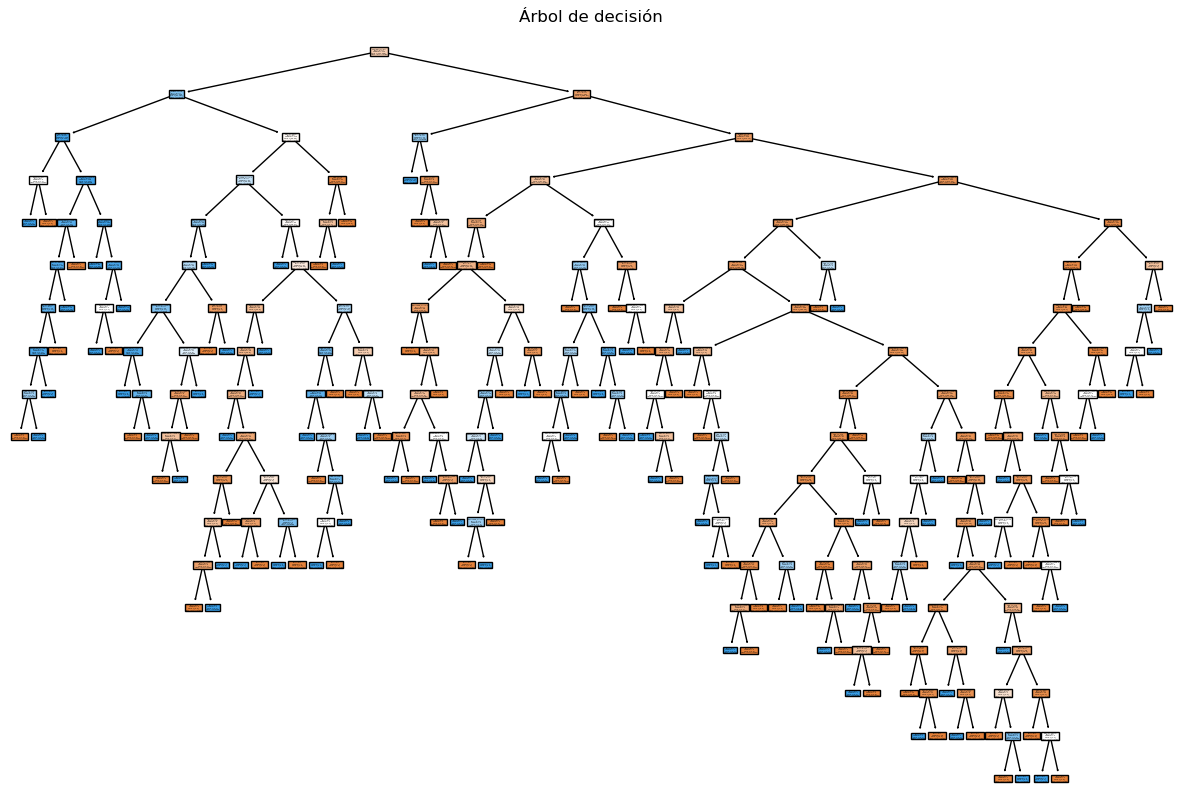

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer el archivo CSV
print('::::Reading file::::')
data = pd.read_csv('Titanic-Dataset.csv')

# Primeras filas del DataFrame - estructura de los datos
print(data.head())

# Columna de la variable objetivo
target_column = 'Survived'

# Características (X) y variable objetivo (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Procesamiento de datos: convertir columnas categóricas en variables dummy
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Rellenar valores faltantes en las columnas numéricas
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

# Como 'Cabin' y 'Name' son columnas con datos no numéricos y posiblemente poco informativos para el modelo básico,
# se pueden eliminar para este análisis inicial. Además, 'Ticket' también se puede omitir por la misma razón.
X = X.drop(['Cabin', 'Name', 'Ticket'], axis=1)

# Verificar si quedan valores faltantes
print("Valores faltantes por columna:")
print(X.isnull().sum())

# Conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print('::::Results::::')

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Árbol de decisión")
plt.show()
